In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("car data.csv")

In [3]:
data.shape

(301, 9)

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
data.duplicated().sum()

2

In [11]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [12]:
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: xlabel='count', ylabel='Car_Name'>

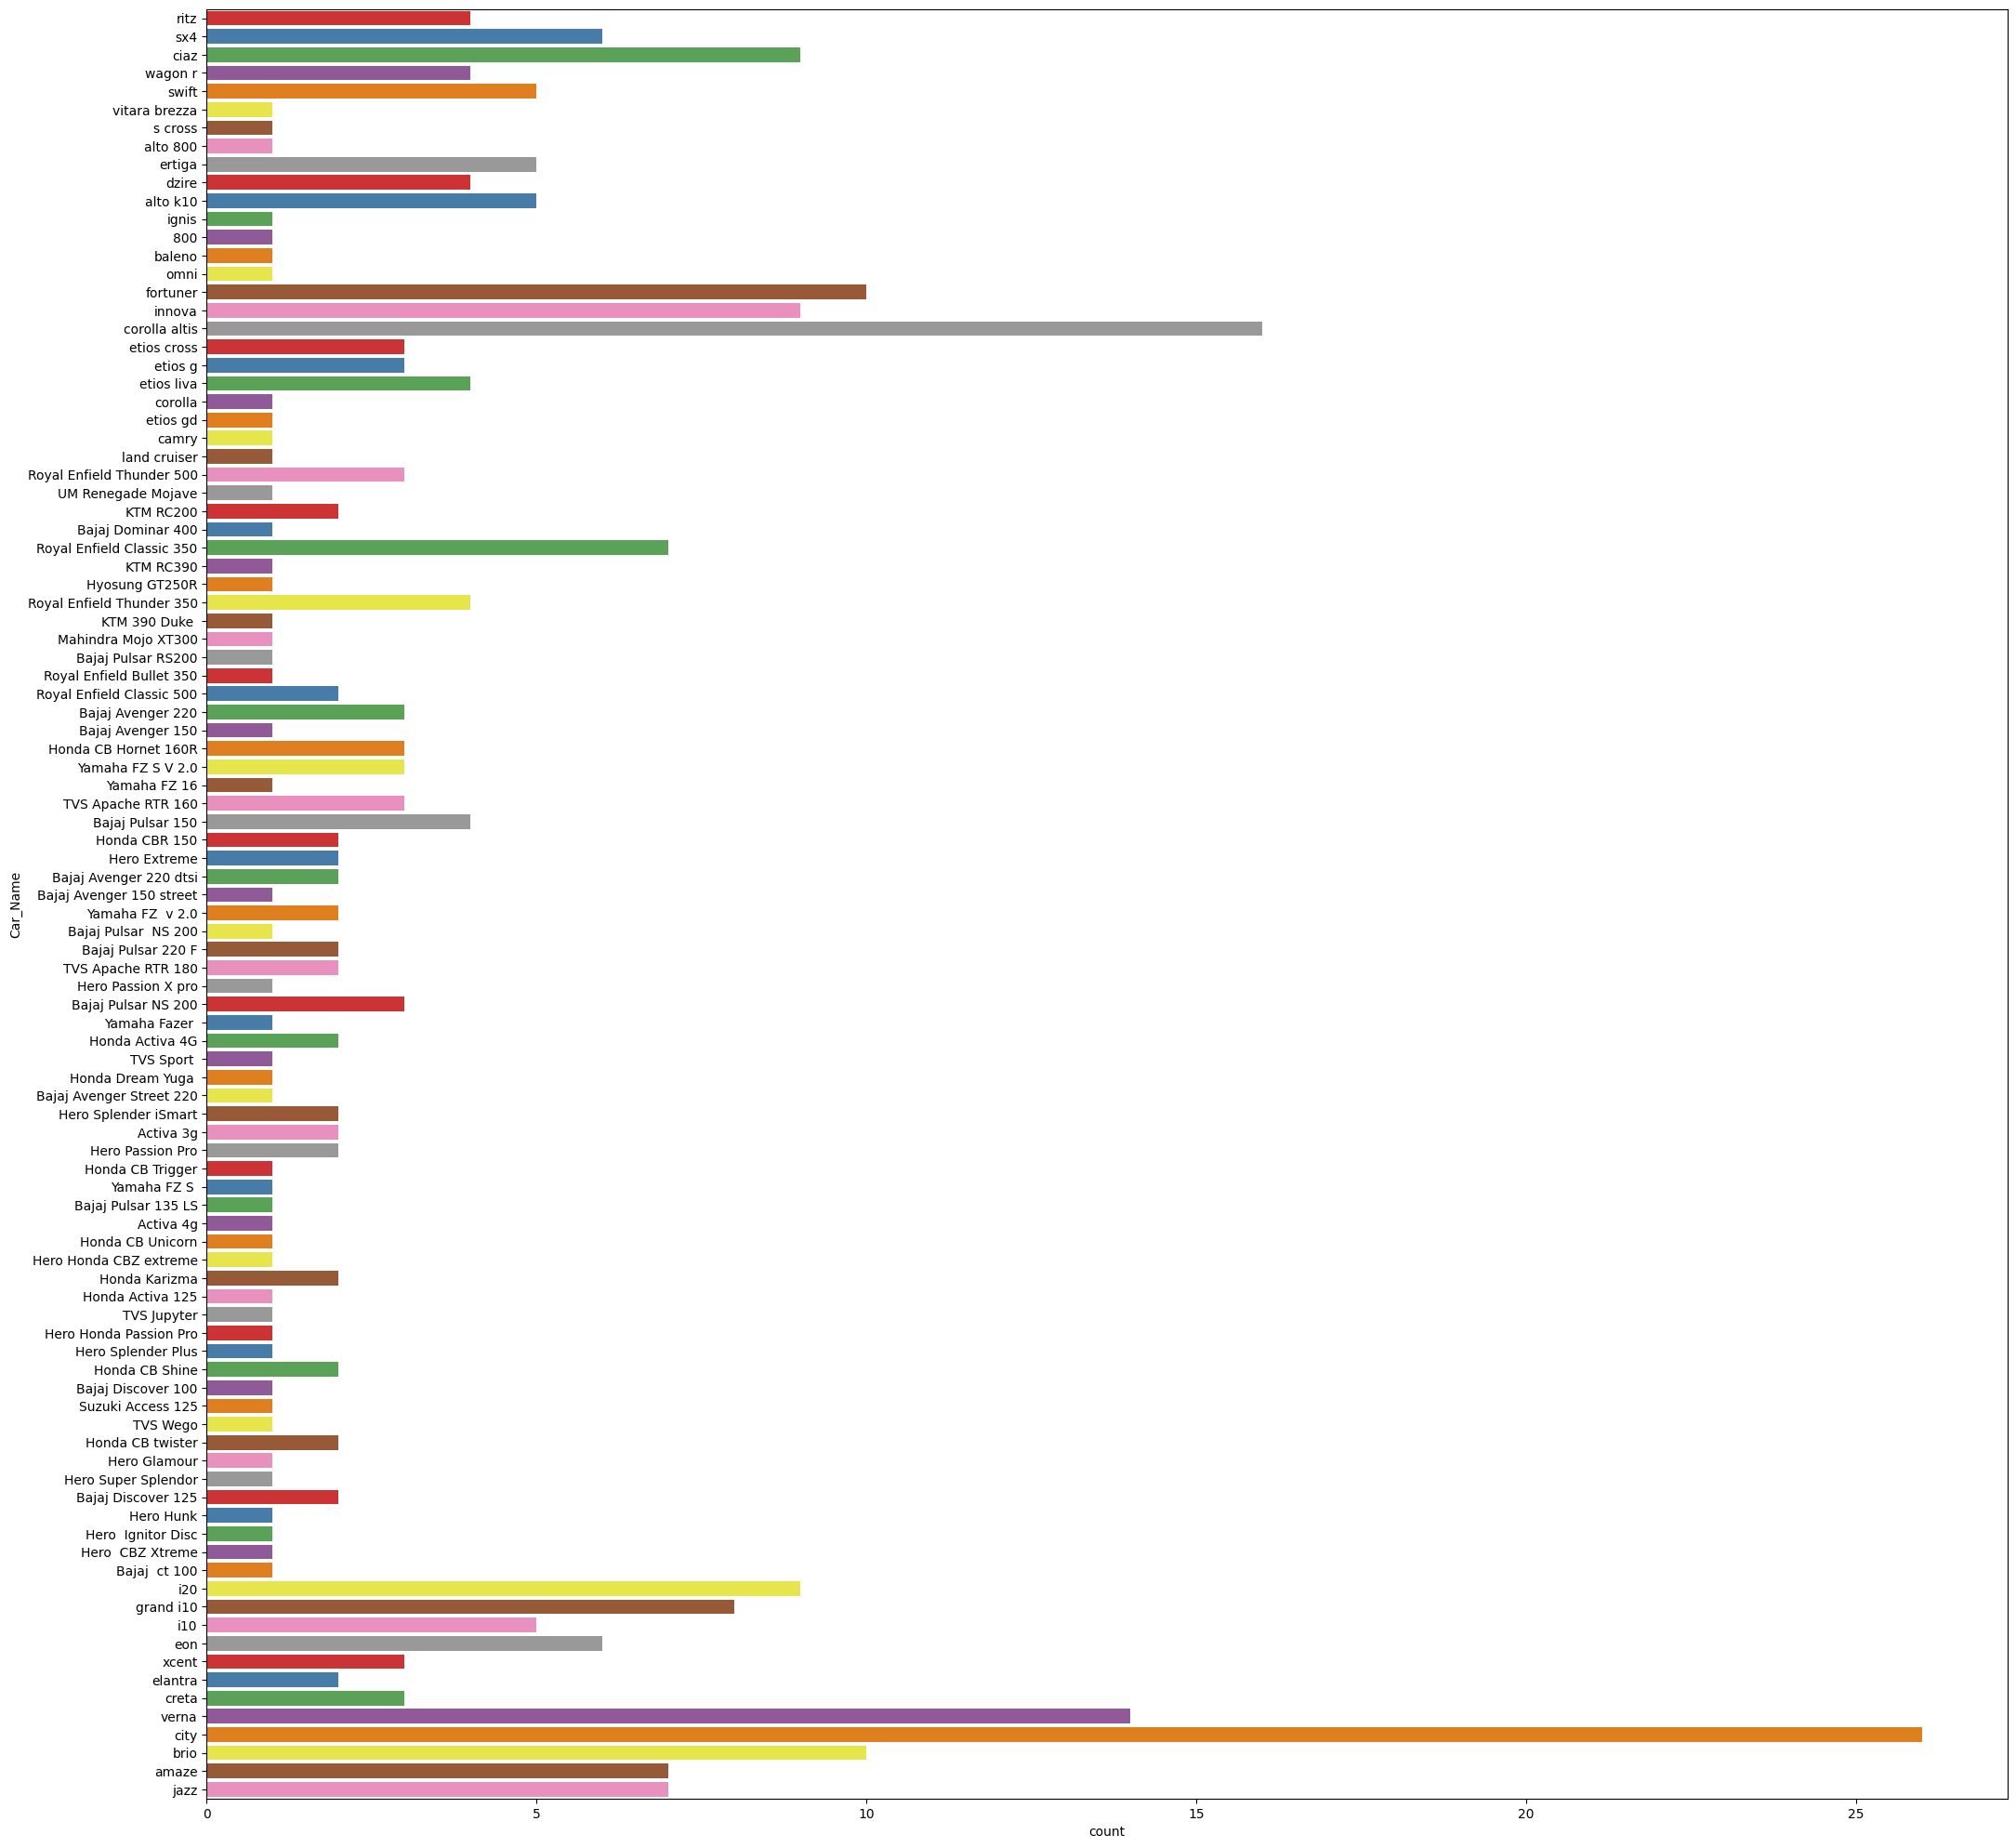

In [13]:
plt.figure(figsize=(25,25))
sb.countplot(y="Car_Name",data=data,palette="Set1")

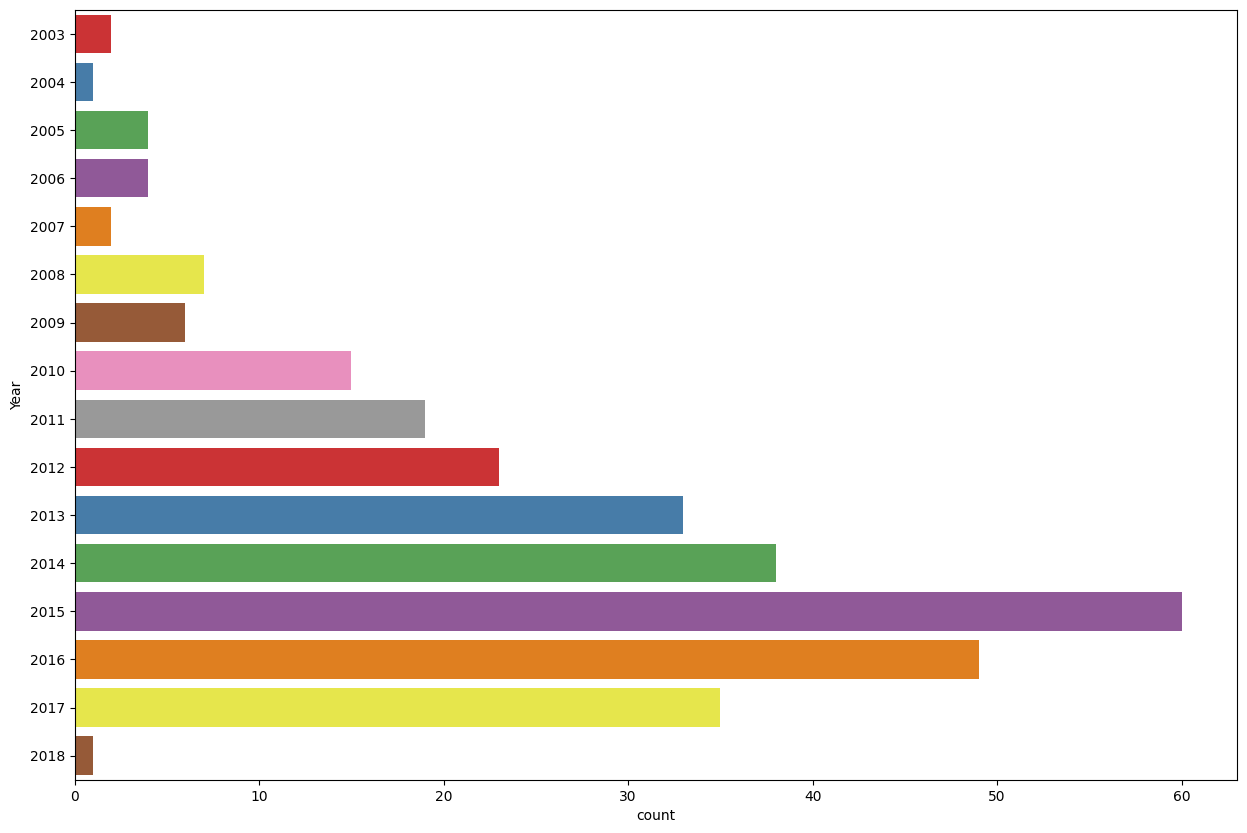

In [14]:
plt.figure(figsize=(15,10))
sb.countplot(y="Year",data=data,palette="Set1")
plt.show()

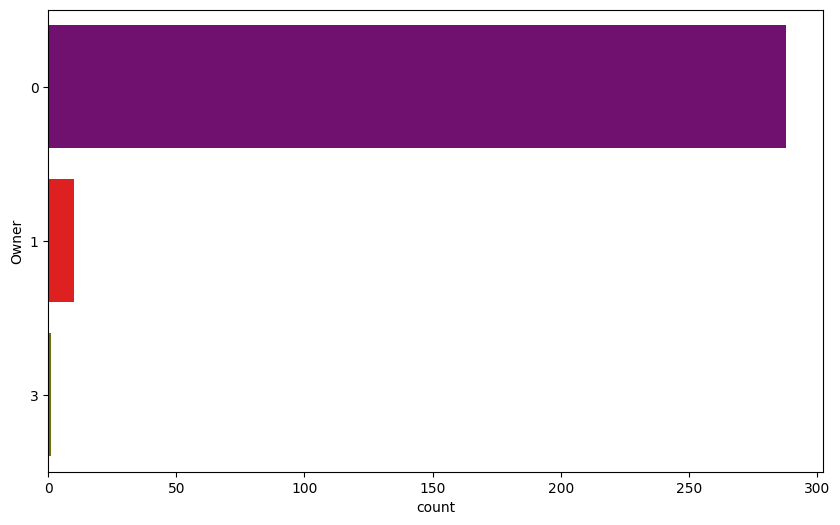

In [15]:
plt.figure(figsize=(10,6))
sb.countplot(y="Owner",data=data,palette="brg")
plt.show()

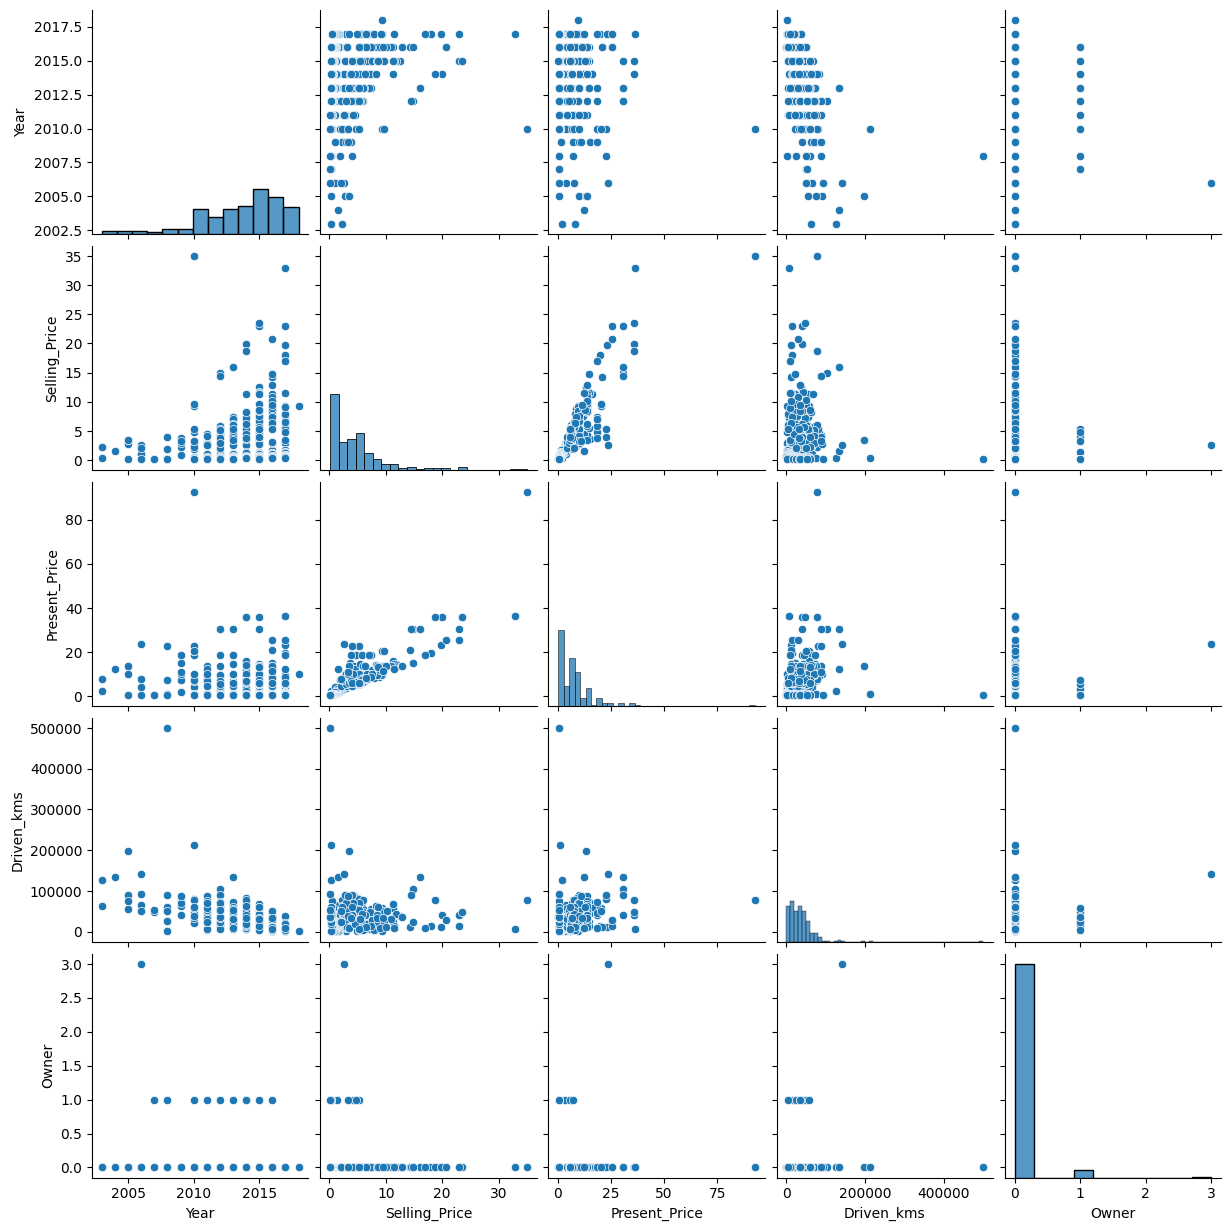

In [41]:
sb.pairplot(data)
plt.show()

In [43]:
data.dropna(inplace=True)

In [44]:
data=pd.get_dummies(data,drop_first=True)

In [45]:
x=data.drop("Selling_Price",axis=1)
y=data["Selling_Price"]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [48]:
from sklearn.preprocessing import StandardScaler


In [49]:
scaler=StandardScaler()

In [50]:
xtrain_scaled=scaler.fit_transform(xtrain)

In [51]:
xtest_scaled=scaler.fit_transform(xtest)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model=LinearRegression()

In [57]:
model.fit(xtrain_scaled,ytrain)

LinearRegression()

In [67]:
test_pred=model.predict(xtest_scaled)

In [68]:
train_pred=model.predict(xtrain_scaled)

In [69]:
from sklearn.metrics import mean_squared_error, r2_score


In [71]:
print('Train MSE',mean_squared_error(ytrain,train_pred))
print('Test MSE',mean_squared_error(ytest,test_pred))
print('Train R^2',r2_score(ytrain,train_pred))
print('Test R^2',r2_score(ytest,test_pred))

Train MSE 1.0903618269153676
Test MSE 3.372245582729848e+27
Train R^2 0.9532268718248572
Test R^2 -1.220820492636364e+26
